# Techincal Setup

## Python

In [1]:
#data processing
import numpy as np
import pandas as pd
import os
import datetime

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import math as math

from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

import warnings
warnings.filterwarnings('ignore')



## R

In [2]:
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.3.1'  

# import rpy2's package module
from rpy2.robjects.packages import importr
from functools import partial
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

%load_ext rpy2.ipython

In [3]:
%%R
library(ggplot2)
library(ggstatsplot)
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.1     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167


# Data Collection

In [7]:
df = pd.read_csv('data\df_clean.csv')

# Exploratory Data Analysis

The exploration of the processed and cleaned data begins with a high-level examination of its distribution. Numerical variables are categorized into specific groups based on their contextual relevance. In this analysis, these variables have been categorized into three distinct groups: RFM (Recency, Frequency, Monetary), Customer Behavior (related to the business), and Demographic variables.

In [4]:
def plot_hist(df, column, title, bins=50, kde=True, color='#0D0D0D', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))
    sns.histplot(df[column], bins=bins, kde=kde, color=color, ax=ax)
    ax.set_title(title, fontsize=14, fontweight='semibold', fontfamily='sans-serif', color="#413f42",
                bbox=dict(facecolor='#f0f0f0', edgecolor='#d5d3d6', boxstyle='round,pad=0.6', alpha=0.6))
    ax.set_xlabel(column, fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
    ax.set_ylabel('Count', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
    ax.grid(False)
    
def plot_hist_discrete(df, column, title, bins=10, color='#0D0D0D', ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    # Create a histogram for numeric discrete data
    sns.histplot(df[column], bins=bins, discrete=True, color=color, ax=ax)


    ax.set_title(title, fontsize=14, fontweight='semibold', fontfamily='sans-serif', color="#413f42",
                bbox=dict(facecolor='#f0f0f0', edgecolor='#d5d3d6', boxstyle='round,pad=0.6', alpha=0.6))
    ax.set_xlabel(column, fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
    ax.set_ylabel('Count', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
    ax.grid(False)

In [5]:
demographic_vars = ['Age', 'Income', 'Family_Size']
rfm_vars = ['Avg_RFM', 'Recency_Score', 'Frequency_Score', 'Monetary_Score']
campaign_vars = ['Total_Accepted_Campaigns', 'Engagement_Rate', 'AcceptedAnyCmp']
purchase_vars = ['Total_Purchases', 'Total_Spending', 'Spend_per_Purchase']
web_vars = ['NumWebVisitsMonth', 'NumWebPurchases']
catalog_vars = ['NumCatalogPurchases']
store_vars = ['NumStorePurchases']
mnt_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
kid_vars = ['Kidhome', 'Teenhome', 'Living_With', 'Is_Parent']
other_vars = ['Education', 'Marital_Status', 'Country', 'Generation', 'Month_Joined', 'Customer_Tenure']


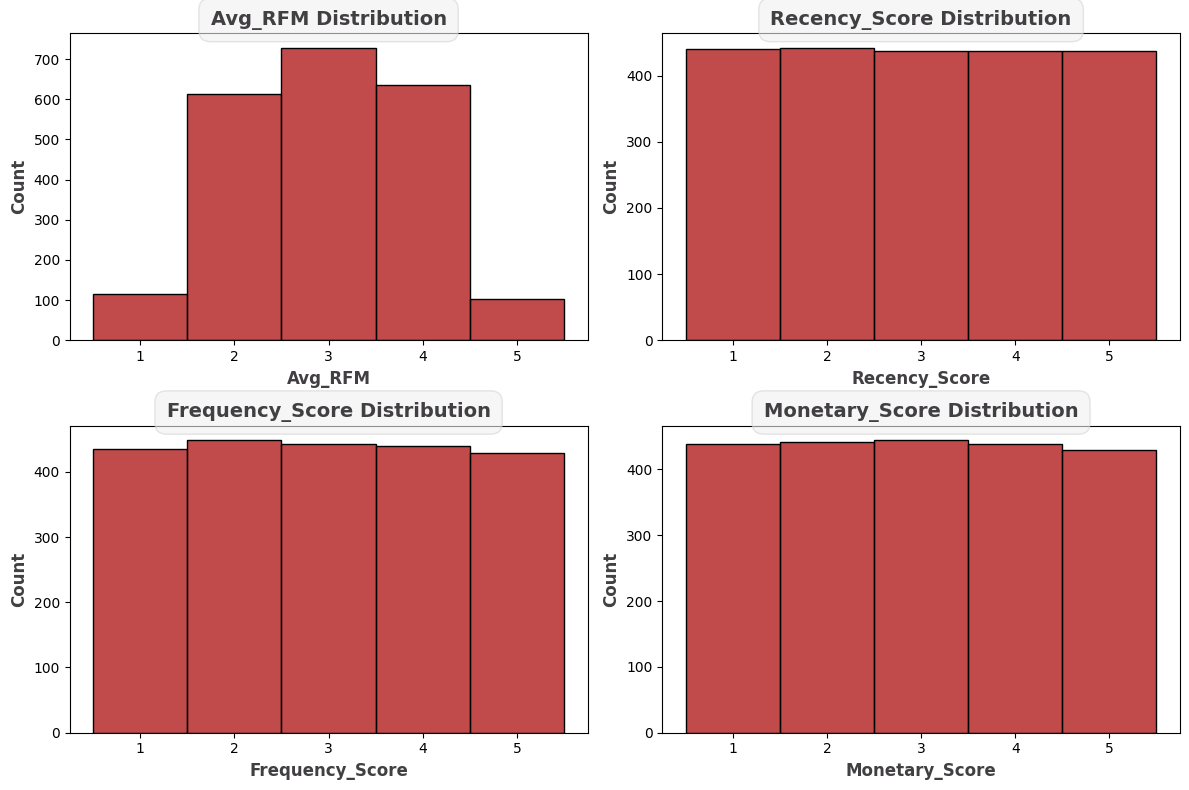

In [61]:
# Create the histograms for numeric discrete data with 2 columns per row
columns = rfm_vars
num_cols = len(columns)
num_rows = math.ceil(num_cols / 2)  # Calculate the number of rows needed

fig, axs = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
axs = axs.ravel()

for i, column in enumerate(columns):
    plot_hist_discrete(df, column, f'{column} Distribution', color='#AD0D0D', ax=axs[i])

# Hide any empty subplots
for i in range(num_cols, num_rows * 2):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Key highlights from the RFM (Recency, Frequency, Monetary) score metrics:

1. **Average RFM Score**:
   - The dataset's average RFM score is approximately 2.99.
   - RFM scores, which range from 1.00 (lowest) to 5.00 (highest), reflect the overall engagement and value of customers.

2. **Recency Score**:
   - Customers exhibit an average recency score of about 2.99, suggesting a balanced level of recent engagement.
   - Recency scores span from 1.00 (indicating recent engagement) to 5.00 (reflecting less recent engagement).

3. **Frequency Score**:
   - The average frequency score for customers hovers around 2.99.
   - Frequency scores encompass values from 1.00 (indicating low engagement frequency) to 5.00 (representing high engagement frequency).

4. **Monetary Score**:
   - The dataset's average monetary score is approximately 2.99, reflecting a balanced monetary value across customers.
   - Monetary scores cover a range from 1.00 (indicating lower monetary value) to 5.00 (reflecting higher monetary value).

Although the average score is 2.99 for all three metrics, the distribution of scores varies. The recency score distribution is relatively uniform, indicating that our customers have a consistent level of recent engagement. The frequency score distribution is also relatively uniform, indicating that our customers engage with our business at a similar rate. However, the monetary score distribution is skewed, with a higher proportion of customers having lower monetary values.



Moreover, we have diverse customer base, as highlighted by the distribution of RFM segments:

- **Champions**: Representing approximately 32.47% of customers, these individuals have consistently high engagement and spending.
- **Can't Lose**: Comprising around 27.27% of customers, this segment includes high-value customers who require attention to maintain their engagement.
- **New**: Approximately 19.15% of customers fall into this segment, indicating new or recently engaged customers.
- **Promising**: Representing about 8.16% of customers, this segment includes customers with growth potential.
- **At Risk**: Comprising roughly 6.93% of customers, this group consists of customers whose engagement has declined and need to be re-engaged.
- **Lost**: The smallest segment, accounting for about 6.02% of customers, includes customers who have disengaged.


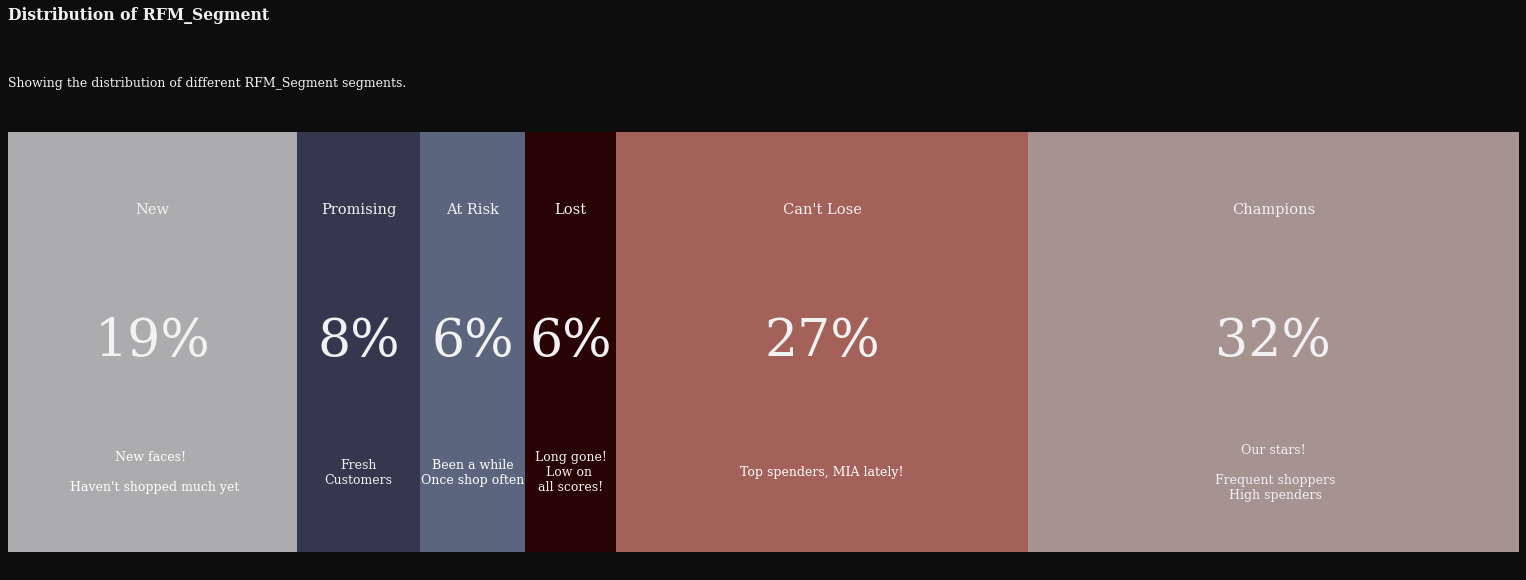

In [54]:
color_palette = ['#F1F0F2', '#45496a', '#7d8bae', '#360000', '#e5857b', '#e8ccc7']

def plot_segment_distribution(df, column):
    journey_order = ['New', 'Promising', 'At Risk', 'Lost', "Can't Lose", 'Champions']
    # Calculate the ratio for each segment
    x = df[column].value_counts(normalize=True).loc[journey_order]
    
    fig, ax = plt.subplots(1,1,figsize=(26, 8), dpi=75)
    left = 0

    colors = ['#5E0000', '#9ECCAE', '#360000',  '#8DB395', '#360000', '#24472B']
    for idx, (segment, value) in enumerate(x.items()):
        ax.barh(column, value, left=left, color=color_palette[idx], alpha=0.7, label=segment)

        descriptions = {
        'Champions': "Our stars!\n\n Frequent shoppers\n High spenders",
        'New': "New faces! \n\n Haven't shopped much yet",
        'Promising': "Fresh\nCustomers",
        'At Risk': "Been a while\nOnce shop often",
        "Can't Lose": "Top spenders, MIA lately!",
        'Lost': "Long gone!\nLow on \nall scores!"
    }
        
        # Annotate the percentage
        ax.annotate(f"{int(value*100)}%", 
                    xy=(left + value/2, 0),
                    va='center', ha='center', fontsize=50, fontweight='light', fontfamily='serif',
                    color='#F2F2F2' if idx % 2 == 0 else '#F1F0F2')
        
        # Annotate the segment name
        ax.annotate(segment, 
                    xy=(left + value/2, 0.25),
                    va='center', ha='center', fontsize=14, fontweight='light', fontfamily='serif',
                    color='#F2F2F2' if idx % 2 == 0 else '#F1F0F2')
        
        # Annotate the segment name with description
        ax.annotate(f"{descriptions[segment]}", 
                    xy=(left + value/2, -0.25),
                    va='center', ha='center', fontsize=12, fontweight='light', fontfamily='serif',
                    color='white' if idx % 2 == 0 else '#F1F0F2')

        left += value

    ax.set_xlim(0, 1)
    ax.set_xticks([])
    ax.set_yticks([])

    fig.patch.set_facecolor('#0D0D0D')
    ax.set_facecolor('#0D0D0D')

    # Title & Subtitle
    fig.text(0.125, 1.03, f'Distribution of {column}', fontfamily='serif', fontsize=15, fontweight='bold', color='#F1F0F2')
    fig.text(0.125, 0.92, f'Showing the distribution of different {column} segments.', fontfamily='serif', fontsize=12, color='#F1F0F2')  

    for s in ['top', 'left', 'right', 'bottom']:
        ax.spines[s].set_visible(False)
    
    # Removing legend due to labelled plot
    ax.legend().set_visible(False)
    plt.show()

# Call the function
plot_segment_distribution(df, 'RFM_Segment')


Next, the analysis was done on the customers behavior and interaction with us. 

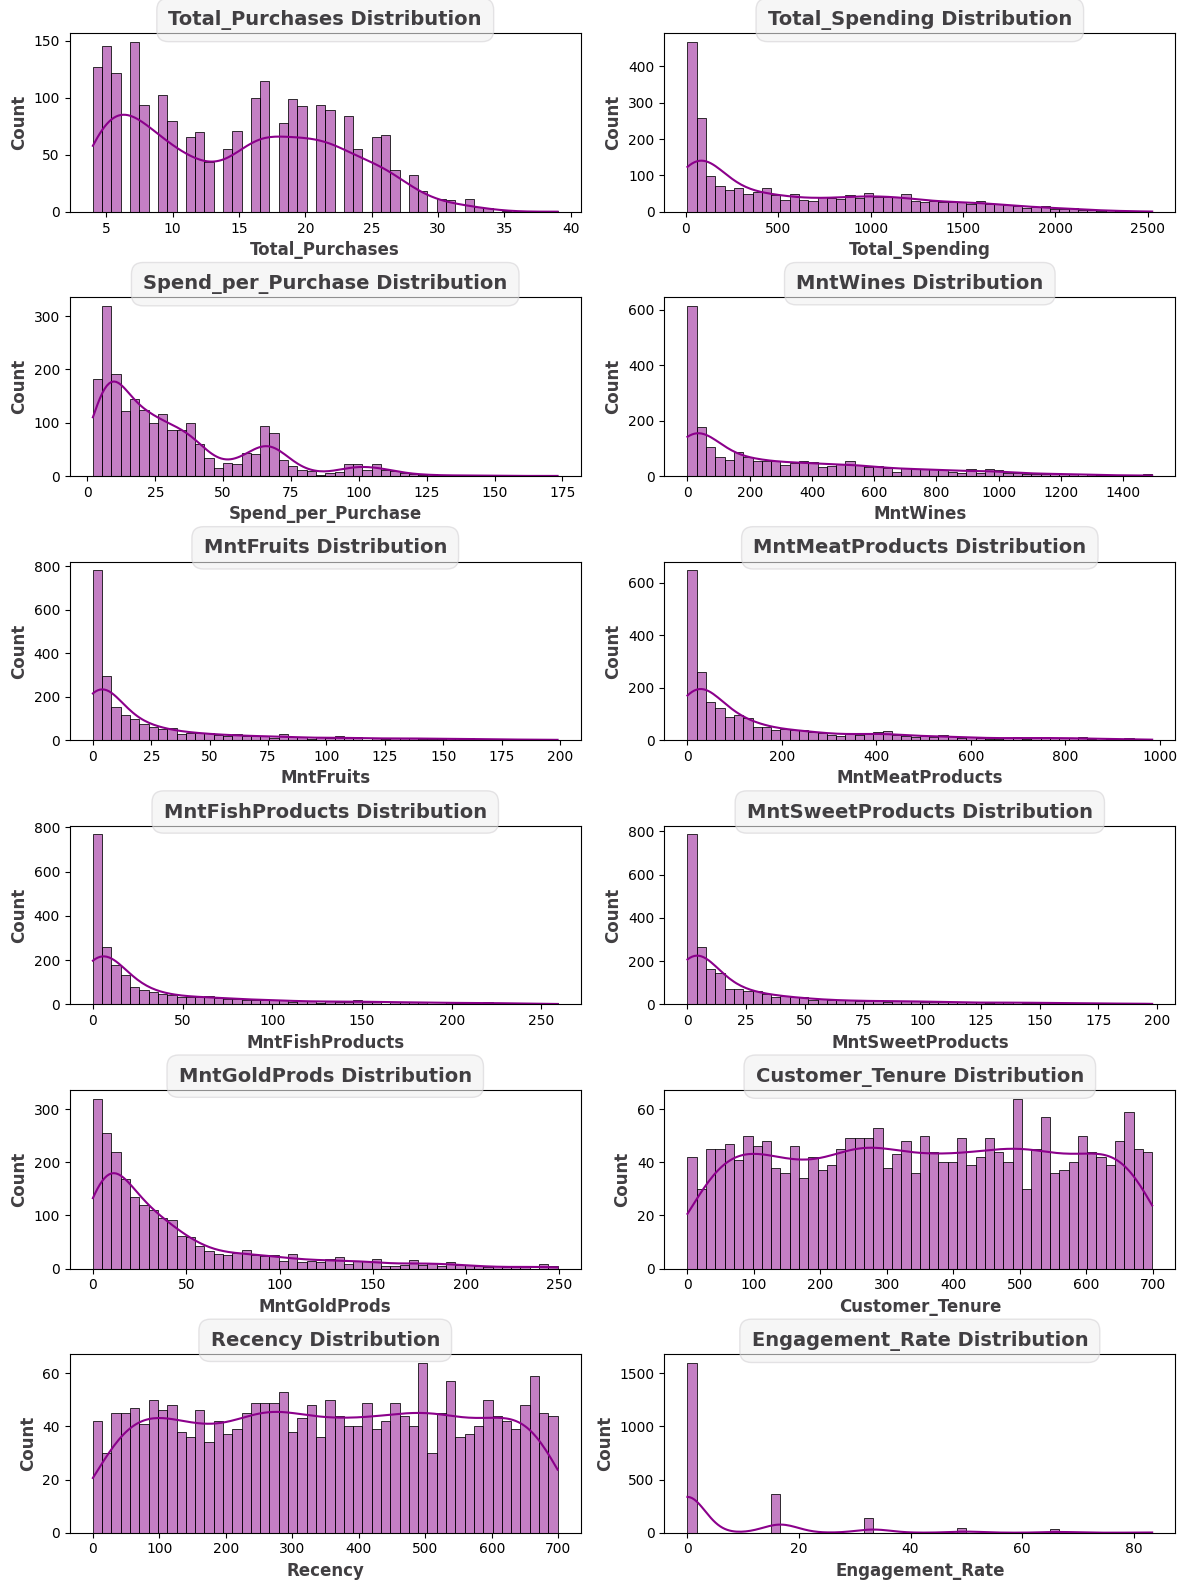

In [56]:

to_plot = purchase_vars + mnt_vars + ['Customer_Tenure', 'Recency', 'Engagement_Rate']
# Create a 6x2 grid
fig, axs = plt.subplots(6,2, figsize=(12, 16))

# Flatten the axes array for easy iteration
axs = axs.ravel()

# Plot each histogram in its respective subplot
for i, column in enumerate(df[to_plot]):
    plot_hist(df, column, f'{column} Distribution', kde=True, color='darkmagenta', ax=axs[i])


# Add titles and labels
for ax in axs:
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

key highlights:

1. **Purchase Behavior**:
   - **Total Purchases**: On average, customers make approximately 14.79 purchases, ranging from 4 to 39 purchases.
   - **Total Spending**: Customers spend an average of approximately $599.41 in total, with spending ranging from $8 to $2,525.
   - **Spend per Purchase**: The average spending per purchase is approximately $32.23, with a wide range from $2.00 to $173.23 per transaction.



2. **Product Category Spending**:
   - **Food Products**: 
     - **MntWines**: Customers spend an average of about $304.12 on wines, ranging from $0 to $1,493.
     - **MntFruits**: The average expenditure on fruits is approximately $26.02, with spending ranging from $0 to $199.
     - **MntMeatProducts**: On average, customers spend around $161.70 on meat products, with expenditures ranging from $0 to $984.
     - **MntFishProducts**: Customers spend an average of approximately $37.52 on fish products, with spending ranging from $0 to $259.
     - **MntSweetProducts**: The average spending on sweet products is about $26.85, ranging from $0 to $198.
     - **MntGoldProds**: Customers, on average, spend approximately $43.19 on gold products, with expenditures ranging from $0 to $249. 
        

3. **Customer Engagement**:
   - **Customer Tenure and Recency**: Both customer tenure and recency share a similar distribution shape.
     - **Customer Tenure**: The average customer tenure is approximately 354.45 units (time period), with variations from 0 to 699 units.
     - **Recency**: The dataset includes information on customer recency, with values ranging from 0 to 699.
   - **Engagement Rate**: On average, the engagement rate for customers is approximately 7.38%, with rates as high as 83.33%.

   

4. **Distribution Shape Insights**:
   - **Customer Tenure and Recency** share a similar distribution shape, indicating potential correlation or similarities in customer behavior over time.
   - **MntWines, MntFruits, MntFish, MntMeatProducts, MntFruits, MntFishProducts, and MntGoldProds** all share a similar positively skewed distribution shape, suggesting that customers tend to spend more in these product categories.
   - Note that these positively skewed variables may need to be standardized before applying clustering algorithms to ensure that they have a consistent scale for analysis.


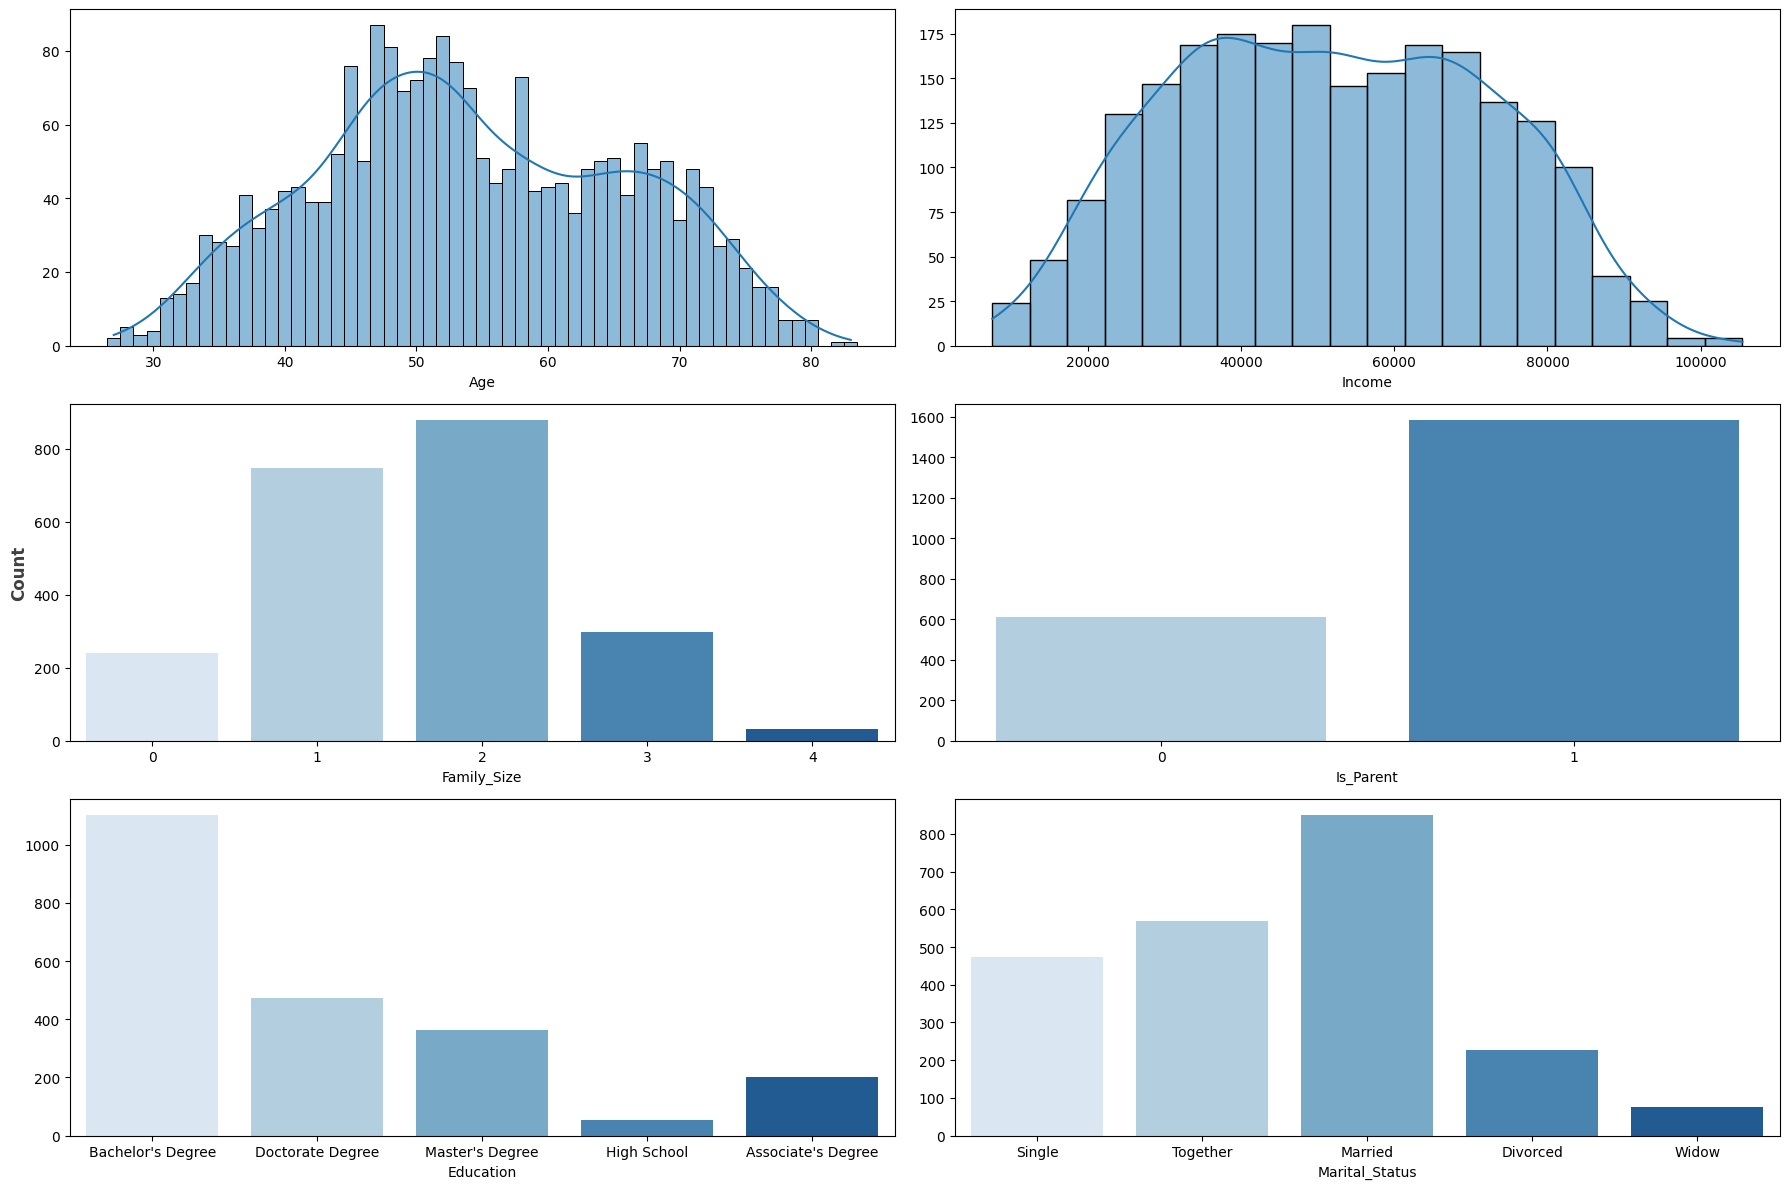

In [31]:
# Create a 2x2 grid
fig, axs = plt.subplots(3, 2, figsize=(18, 12))

# Plot each histogram in its respective subplot
sns.histplot(x='Age', data=df, palette='Blues', ax=axs[0, 0], kde=True, discrete=True)

sns.histplot(x='Income', data=df, palette='Blues', ax=axs[0, 1], kde=True)

sns.countplot(x='Family_Size', data=df, palette='Blues', ax=axs[1, 0])

#plot is_parent distribution using countplot
sns.countplot(x='Is_Parent', data=df, palette='Blues', ax=axs[1, 1])

sns.countplot(x='Education', data=df, palette='Blues', ax=axs[2, 0])

sns.countplot(x='Marital_Status', data=df, palette='Blues', ax=axs[2, 1])

# # Add titles and labels
# axs[0, 0].set_title('Age Distribution', fontsize=14, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
# axs[0, 1].set_title('Income Distribution', fontsize=14, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
# axs[1, 0].set_title('Family_Size Distribution', fontsize=14, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
# axs[1, 1].set_title('Is_Parent Distribution', fontsize=14, fontweight='semibold', fontfamily='sans-serif', color="#413f42")

# axs[0, 0].set_xlabel('Age', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
# axs[0, 1].set_xlabel('Income', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
# axs[1, 0].set_xlabel('Family_Size', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
# axs[1, 1].set_xlabel('Is_Parent', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")

axs[0, 0].set_ylabel('', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
axs[0, 1].set_ylabel('', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
axs[1, 0].set_ylabel('Count', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
axs[1, 1].set_ylabel('', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
axs[2, 0].set_ylabel('', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")
axs[2, 1].set_ylabel('', fontsize=12, fontweight='semibold', fontfamily='sans-serif', color="#413f42")


axs[0, 0].grid(False)
axs[0, 1].grid(False)
axs[1, 0].grid(False)
axs[1, 1].grid(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Key highlights:

1. **Age Distribution**:
- The dataset predominantly consists of mature customers, with an average age of approximately 54 years.
- The majority of customers are in the age range of 46 to 64 years, with some exceptions ranging from 27 to 83 years.

2. **Income Distribution**:
- Customer incomes exhibit a relatively normal distribution, with an average income of around $51,599.
- Income levels vary across customers, spanning from a minimum of $7,500 to a maximum of $105,471.


3. **Family Size Distribution**:
- Most customers have smaller family sizes, with an average family size of approximately 1.61.
- Common family sizes observed include 1 and 2 members, but family sizes can extend from single individuals (0) to larger families with up to 4 members.


4. **Is_Parent Distribution**:
- On average, approximately 72% of customers in the dataset are parents (Is_Parent = 1).
- The remaining 28% of customers are not parents (Is_Parent = 0).


**Demographic Insights:**

1. **Age Distribution**:
   - The majority of our customer base falls within the mature age group, with an average age of 54 years.
   - The age range spans from 27 to 83 years, reflecting a broad age diversity.

2. **Income Distribution**:
   - Customer income distribution is relatively balanced, with an average income of $51,599.
   - Incomes vary across customers, ranging from $7,500 to $105,471.

3. **Family Size Distribution**:
   - Most customers have smaller families, with an average family size of approximately 1.61 members.
   - Family sizes commonly range from 1 to 2 members, although larger families with up to 4 members are also represented.

4. **Is_Parent Distribution**:
   - About 72% of our customer base are parents, while the remaining 28% are not parents.

5. **Education Distribution**:
   - Our customers exhibit a diverse range of educational backgrounds.
   - The most common education level is "Bachelor's Degree" (approximately 50.25%), followed by "Doctorate Degree" (approximately 21.57%), "Master's Degree" (approximately 16.60%), "Associate's Degree" (approximately 9.12%), and "High School" (approximately 2.46%).

6. **Marital Status Distribution**:
   - Marital statuses among our customers are diverse.
   - "Married" is the most prevalent status (approximately 38.76%), followed by "Together" (approximately 25.90%), "Single" (approximately 21.56%), "Divorced" (approximately 10.35%), and "Widow" (approximately 3.42%).



## Correlation Analysis

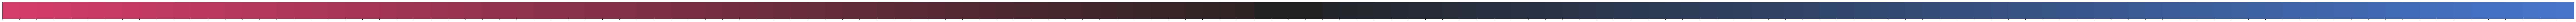

In [5]:
#defining color palette
sns.palplot(sns.diverging_palette(0, 255, sep=8, n=150, center='dark'))

main_facecolor = '#FFFFFF'
main_facecolor2 = '#0D0D0D'
cmap1 = sns.diverging_palette(230, 20, as_cmap=True)
cmap2 = ["#e27c7c", "#a86464", "#6d4b4b", "#503f3f", "#333333", "#3c4e4b", "#466964", "#599e94", "#6cd4c5"]
cmap3 = sns.diverging_palette(0, 255, sep=1, n=50, center='dark')

In [6]:
def is_binary(series, unique_tol=2):
    return series.nunique() <= unique_tol

def mixed_corr(df):
    corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    
    for col1 in df.columns:
        for col2 in df.columns:
            try:
                if is_binary(df[col1]) and is_binary(df[col2]):
                    # Both are binary
                    corr_val = df[col1].corr(df[col2], method='pearson')
                elif is_binary(df[col1]) or is_binary(df[col2]):
                    # One is binary and the other is continuous
                    binary_col = col1 if is_binary(df[col1]) else col2
                    cont_col = col2 if is_binary(df[col1]) else col1
                    corr_val = pointbiserialr(df[cont_col], df[binary_col])[0]
                else:
                    # Both are continuous
                    corr_val = df[col1].corr(df[col2])
                
                corr_matrix.at[col1, col2] = corr_val
            except Exception as e:
                print(f"An error occurred while processing {col1} and {col2}: {e}")
    return corr_matrix

def enforce_symmetry(df):
    return (df + df.T)/2


def plot_heatmap(data, title, figsize=(16, 10)):
    mask = np.triu(np.ones_like(data, dtype=bool))
    fig, ax = plt.subplots(figsize=figsize, facecolor=main_facecolor)
    ax.set_facecolor('#f0f0f0')
    ax.grid(False)
    ax.set_title(title, fontsize=14, fontweight='semibold', fontfamily='sans-serif', color="#413f42",
                 bbox=dict(facecolor='#f0f0f0', edgecolor='#d5d3d6', boxstyle='round,pad=0.6', alpha=0.6))

    _ = sns.heatmap(data, cmap=cmap3, vmax=1, vmin=-1, center=0, square=True, annot=True, linewidths=.5,
                    linecolor='#f0f0f0', cbar_kws={"shrink": .5}, annot_kws={"size": 8}, fmt=".2f")

In [7]:
#creating clustered correlation matrix
df_numeric = df.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
mixed_corr_matrix = mixed_corr(df_numeric)

dissimilarity = 1 - abs(mixed_corr_matrix)

# Enforce symmetry
symmetric_dissimilarity = enforce_symmetry(dissimilarity)

# Set diagonal to zero
np.fill_diagonal(symmetric_dissimilarity.values, 0)

# Check for symmetry
print((symmetric_dissimilarity.T == symmetric_dissimilarity).all().all())

# Proceed with clustering
Z = linkage(squareform(symmetric_dissimilarity), 'ward')

#Clusterize the data
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(df_numeric.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(df_numeric[i])
    else:
        df_to_append = pd.DataFrame(df_numeric[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

clustered_corr = clustered.corr()

True


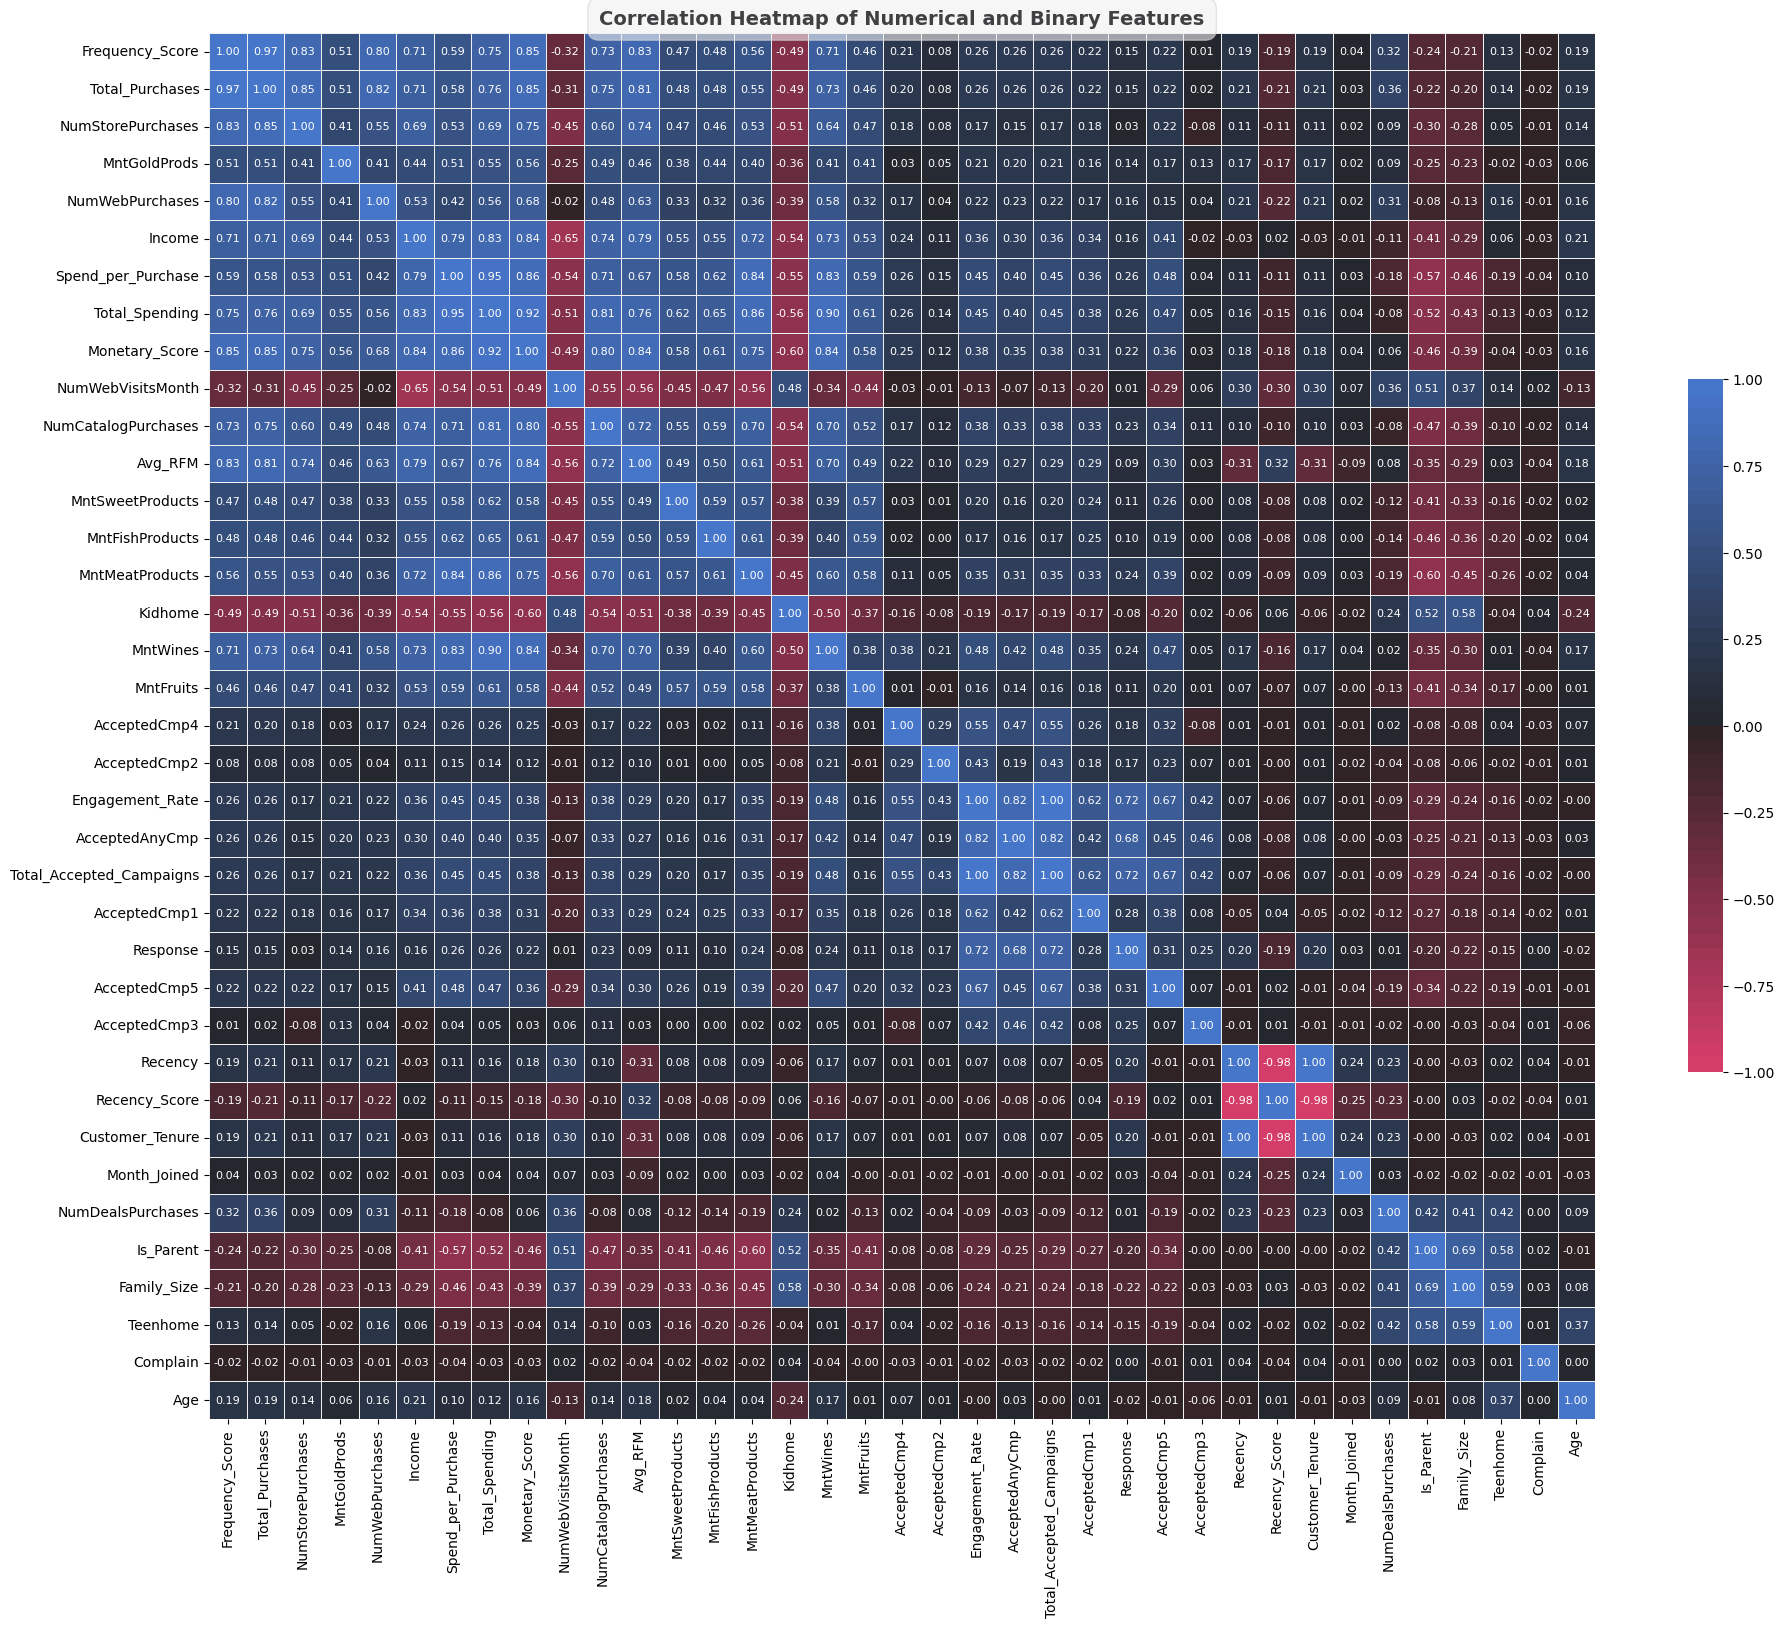

In [8]:
# Plot heatmap for categorical and binary variables
plot_heatmap(clustered_corr.astype(float), title='Correlation Heatmap of Numerical and Binary Features', figsize=(24, 18))

> From this high-level view using a clustered heatmap, it's evident that many variables exhibit correlations with each other, as indicated by the bright blue and red colors. Therefore, a thoughtful and strategic approach will be required when selecting which variables to include in clustering, as these correlations can significantly impact the clustering results. Careful consideration is necessary because the inclusion of highly correlated variables can lead to redundancy and may not provide additional meaningful insights in the clustering process. Additionally, it's important to strike a balance between capturing important features and avoiding multicollinearity to ensure the effectiveness of the clustering analysis.

When selecting variables, solely relying on independence criteria can sometimes lead to including less relevant ones for achieving our business goals. To ensure we pick variables that truly matter for key performance indicators (KPIs), it's crucial to focus on those that capture a customer's overall importance to our business.

While an ideal choice would be Customer Lifetime Value (CLTV), our available data doesn't allow for a direct CLTV calculation. Although it's possible to derive CLTV from the data using prediction algorithms, using predicted values for clustering introduces additional uncertainty and potential errors. Given that clustering itself involves inherent uncertainties and errors, our approach is to prioritize data sources that minimize external uncertainties, ensuring a more robust foundation for the clustering analysis

To maintain precision and minimize uncertainties, we will work with the available data. Therefore, we'll use the Average RFM score as our primary metric. When addressing collinearity and the need to select variables, we'll prioritize those showing stronger correlations with the Average RFM score. This will ensures that the variables we choose closely align with our business objectives and provide a solid foundation for effective clustering analysis.

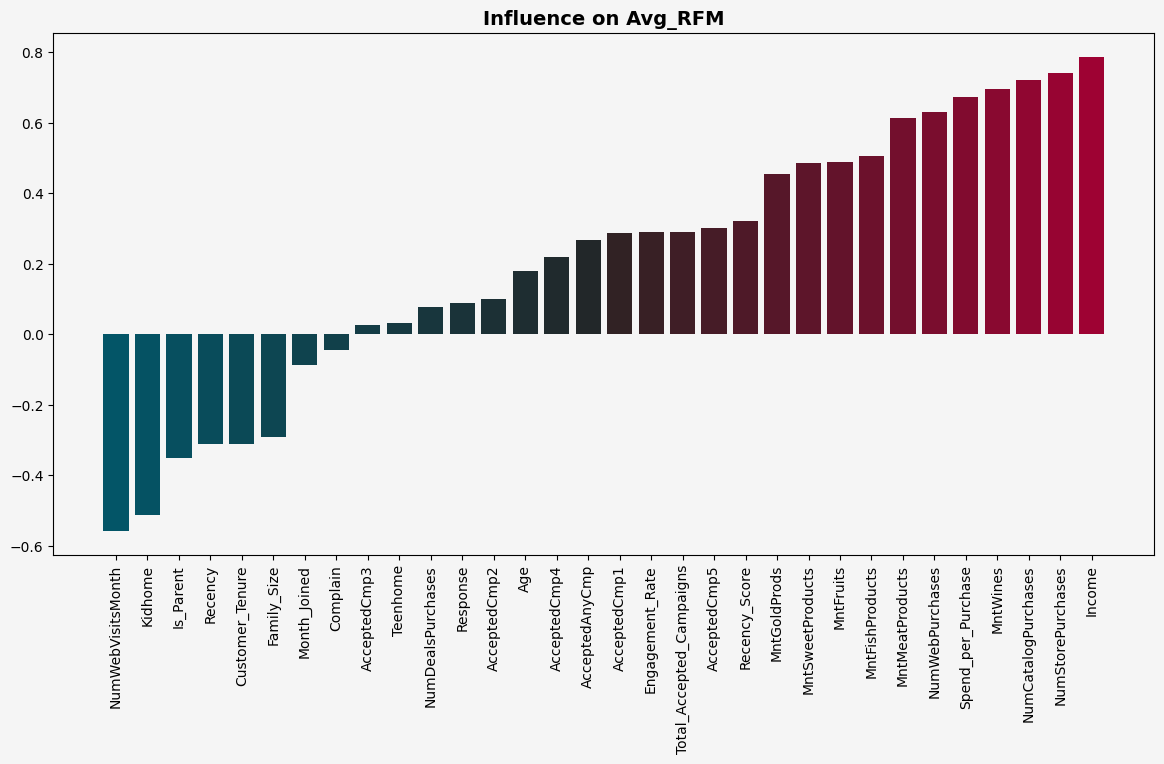

In [9]:
#function to plot the bar
def plot_df_bar2(df, title, settings, horizontal=False):
    fig, ax = plt.subplots(figsize=settings['figsize'])
    cmap = sns.diverging_palette(h_neg=220, h_pos=5, s=99, l=33, sep=5, n=32, center='dark')

    ax.set_facecolor('whitesmoke')
    fig.set_facecolor('whitesmoke')
    
    if not horizontal:
        ax.bar(df.index, df.values, color=cmap, width=settings['width'])
        ax.set_xlabel(settings['x_label'], fontsize=settings['fontsize_axes_label'])
        ax.set_ylabel(settings['y_label'], fontsize=settings['fontsize_axes_label'])
    else:
        ax.barh(df.index, df.values, color=cmap, height=settings['width'])  # Use ax.barh for horizontal bars
        ax.set_ylabel(settings['x_label'], fontsize=settings['fontsize_axes_label'])  # Swap x and y labels
        ax.set_xlabel(settings['y_label'], fontsize=settings['fontsize_axes_label'])  # Swap x and y labels

    ax.set_title(title, fontsize=settings['fontsize_title'], fontweight='bold')
    ax.grid(False)

    if horizontal:
        plt.yticks(rotation=settings['x_label_rotation'])  # Rotate y-ticks if horizontal
    else:
        plt.xticks(rotation=settings['x_label_rotation'])

    plt.tight_layout(pad=2)
    plt.show()

def plot_bar(df, title, horizontal=False, **kwargs):
    bar_setting_dict={
                    'x_label' : '',
                    'y_label' : '',
                    'figsize' :(6,4),
                    'layout' : (1, 1),
                    'width' : 0.3,
                    'align' : 'center',
                    'fontsize_legend': 14,
                    'x_label_rotation': 0,
                    'subplots' : False,
                    'fontsize_title' : 14,
                    'fontsize_axes_values' : 14,
                    'fontsize_axes_label' : 14,
                    'fontsize_text' : 14,
                    'fontsize_legend' : 14,
                    'set_yticks_range' : False,
                    'yticks_start' : None,
                    'yticks_end' : None,
                    'yticks_step' : None,
                    'legend_state' : False,
                    'legend_list_to_plot' : '',
                    'legend_move' : False,
                    'legend_x' : None,
                    'legend_y' : None}
                    
    for key, value in kwargs.items():
        bar_setting_dict[key] = value

    plot_df_bar2(df, title, bar_setting_dict, horizontal=horizontal)

corr_pairs = clustered_corr.unstack().sort_values()
rfm_features = ['Avg_RFM', 'Frequency_Score', 'Monetary_Score', 'Total_Spending', 'Total_Purchases']
corr_rfm = corr_pairs['Avg_RFM'].drop(rfm_features, axis=0)
plot_bar(corr_rfm, title='Influence on Avg_RFM', width=0.8, figsize=(12, 8), x_label_rotation=90, horizontal=False)


In [28]:
#perform comparisons on various metrics by RFM_Segment
df_rfm = df.groupby(['RFM_Segment']).agg({'Age': 'mean', 'Recency': 'mean', 'Total_Purchases': 'mean', 'Total_Spending': 'mean', 'Engagement_Rate':'mean'}).reset_index()
df_rfm.columns = ['RFM_Segment', 'Age_Median', 'Recency_Mean', 'Frequency_Mean', 'Monetary_Mean', 'Engagement_Rate_Median']

#create customer count using index as id
df_rfm['Customer_Count'] = df.groupby(['RFM_Segment']).size().reset_index(drop=True)
df_rfm['Customer_Percent'] = df_rfm['Customer_Count'] / df_rfm['Customer_Count'].sum() * 100

In [24]:
df_rfm

,RFM_Segment,Customer_Count,Recency_Mean,Frequency_Mean,Monetary_Mean
0,At Risk,55.0,567.77,21.28,1018.82
1,Champions,54.0,153.57,22.34,1240.36
2,Lost,53.0,373.77,13.79,504.89
3,New,51.0,133.14,7.04,72.09
4,Promising,51.0,350.26,6.68,67.75


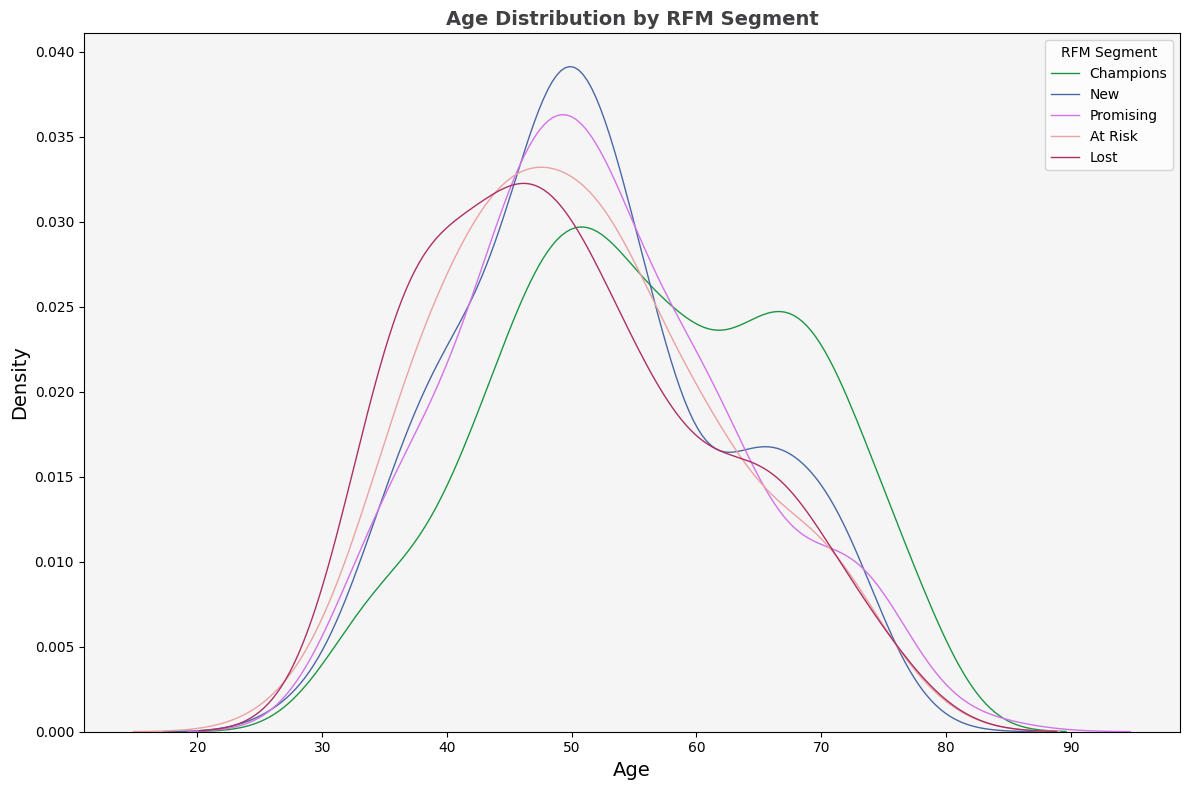

In [10]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Age Distribution by RFM Segment', fontsize=14, fontweight='semibold', color="#413f42")
ax.set_facecolor('#f5f5f5')
rfm_segments = ['Champions', 'New', 'Promising', 'At Risk', 'Lost']
colors = ['#1d9643', '#4a68a3', '#d472e8', '#eba2a2', '#ab3063']

for segment, color in zip(rfm_segments, colors):
    sns.kdeplot(data=df[df['RFM_Segment'] == segment]['Age'], color=color, ax=ax, label=segment, linewidth=1)

ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend(loc='upper right', title='RFM Segment')
plt.tight_layout()
plt.show()
                

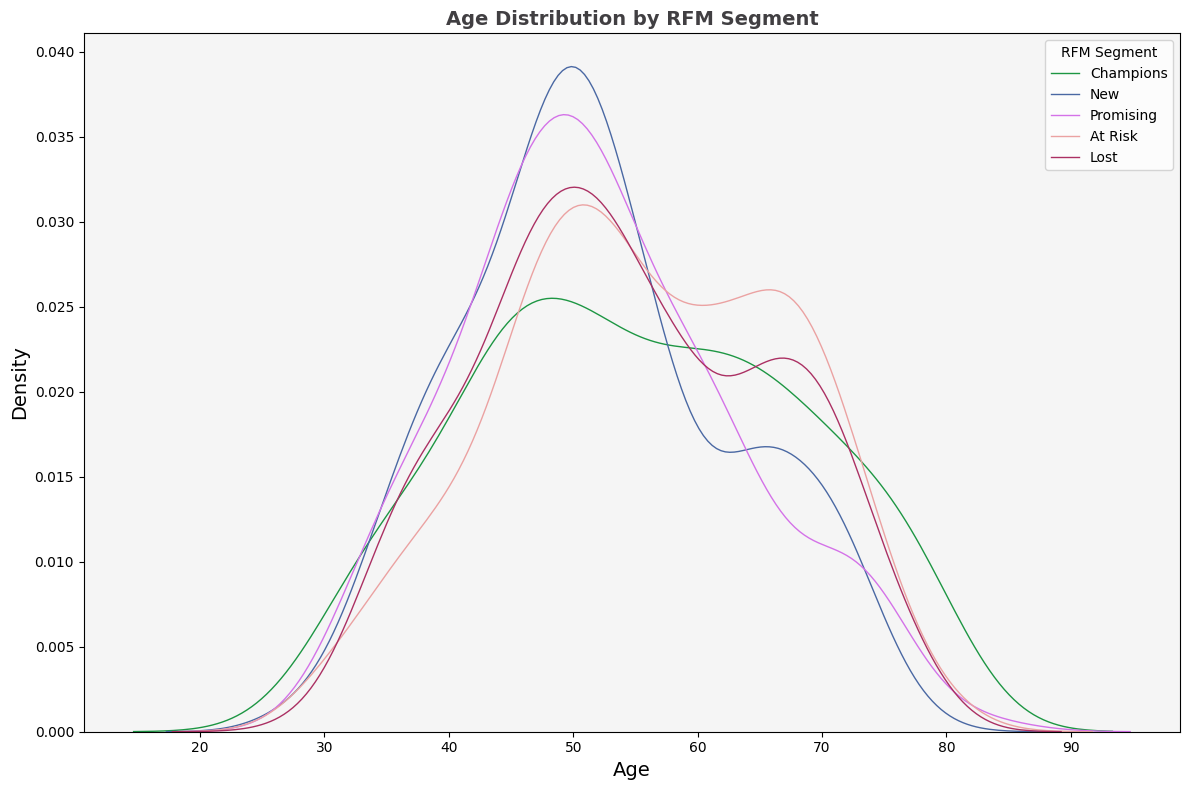

In [12]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Age Distribution by RFM Segment', fontsize=14, fontweight='semibold', color="#413f42")
ax.set_facecolor('#f5f5f5')
rfm_segments = ['Champions', 'New', 'Promising', 'At Risk', 'Lost']
colors = ['#1d9643', '#4a68a3', '#d472e8', '#eba2a2', '#ab3063']

for segment, color in zip(rfm_segments, colors):
    sns.kdeplot(data=df[df['RFM_Segment'] == segment]['Age'], color=color, ax=ax, label=segment, linewidth=1)

ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.legend(loc='upper right', title='RFM Segment')
plt.tight_layout()
plt.show()
                

In [13]:
#create crosstab Education and Marital_Status
pd.crosstab(df['Education'], df['Marital_Status'], margins=True)


Marital_Status,Divorced,Married,Single,Together,Widow,All
Education,,,,,,
2n Cycle,22,81,36,56,5,200
Basic,1,20,18,14,1,54
Graduation,116,427,245,281,33,1102
Master,36,136,75,105,12,364
PhD,52,186,99,112,24,473
All,227,850,473,568,75,2193


Trimmed mean of engagement rate: 5.13%


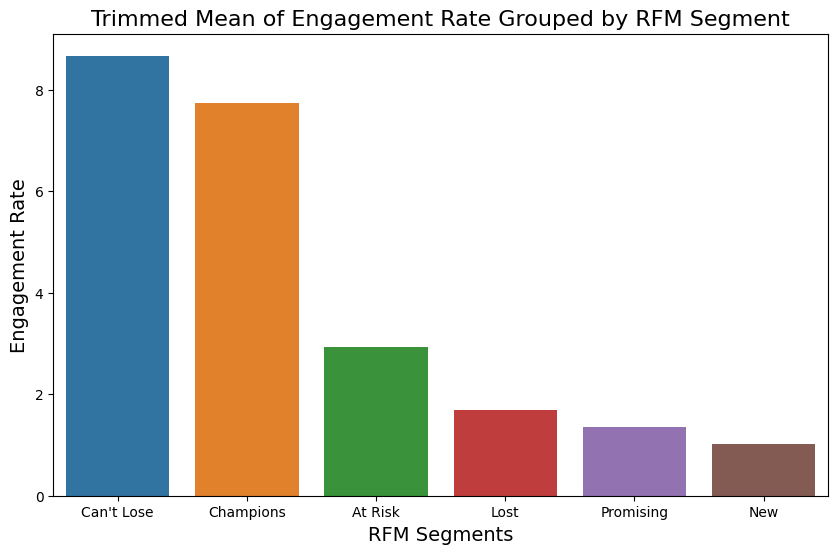

In [11]:
#create a function to calculate trimmed mean
def trimmed_mean(data, trim=0.05):
    n = len(data)
    k = int(round(n*trim))
    data = np.sort(data)
    return np.mean(data[k:-k])

#calculate trimmed mean of engagement rate
print('Trimmed mean of engagement rate: {:.2f}%'.format(trimmed_mean(df['Engagement_Rate'])))

#calculate trimmed mean of engagement rate grouped by month joined
df_trimmed_mean = df.groupby('RFM_Segment')['Engagement_Rate'].apply(trimmed_mean).reset_index()
df_trimmed_mean['Engagement_Rate'] = df_trimmed_mean['Engagement_Rate']
df_trimmed_mean = df_trimmed_mean.sort_values(by='Engagement_Rate', ascending=False)

#plot trimmed mean of engagement rate grouped by month joined
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_trimmed_mean, x='RFM_Segment', y='Engagement_Rate', ax=ax)
ax.set_title('Trimmed Mean of Engagement Rate Grouped by RFM Segment', fontsize=16)
ax.set_xlabel('RFM Segments', fontsize=14)
ax.set_ylabel('Engagement Rate', fontsize=14)
plt.show()

Trimmed mean of engagement rate: 5.13%


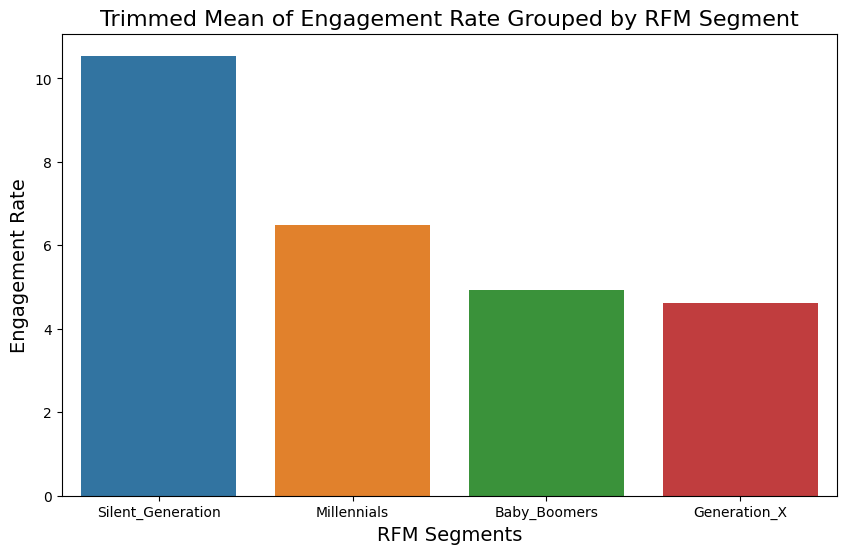

In [12]:
#calculate trimmed mean of engagement rate
print('Trimmed mean of engagement rate: {:.2f}%'.format(trimmed_mean(df['Engagement_Rate'])))

#calculate trimmed mean of engagement rate grouped by month joined
df_trimmed_mean = df.groupby('Generation')['Engagement_Rate'].apply(trimmed_mean).reset_index()
df_trimmed_mean['Engagement_Rate'] = df_trimmed_mean['Engagement_Rate']
df_trimmed_mean = df_trimmed_mean.sort_values(by='Engagement_Rate', ascending=False)

#plot trimmed mean of engagement rate grouped by month joined
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_trimmed_mean, x='Generation', y='Engagement_Rate', ax=ax)
ax.set_title('Trimmed Mean of Engagement Rate Grouped by RFM Segment', fontsize=16)
ax.set_xlabel('RFM Segments', fontsize=14)
ax.set_ylabel('Engagement Rate', fontsize=14)
plt.show()

In [13]:
df_trimmed_mean

,Generation,Engagement_Rate
3,Silent_Generation,10.544218
2,Millennials,6.477987
0,Baby_Boomers,4.930834
1,Generation_X,4.615385


In [8]:
print('Trimmed mean of Engagement Rate: {:.2f}'.format(trimmed_mean(df['Engagement_Rate'])))
print('Trimmed mean of Customer Tenure: {:.2f}'.format(trimmed_mean(df['Customer_Tenure'])))
print('Trimmed mean of Average RFM: {:.2f}'.format(trimmed_mean(df['Avg_RFM'])))


Trimmed mean of Engagement Rate: 0.71
Trimmed mean of Customer Tenure: 356.09
Trimmed mean of Average RFM: 3.01


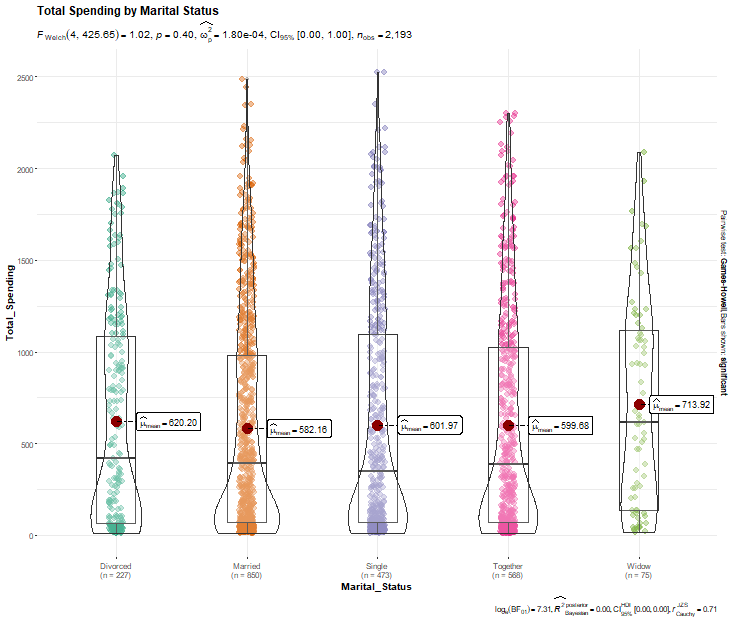

In [17]:
%%R -i df -w 26 -h 22 -u cm

ggbetweenstats(
  data  = df,
  x     = Marital_Status,
  y     = Total_Spending,
  title = "Total Spending by Marital Status"
)

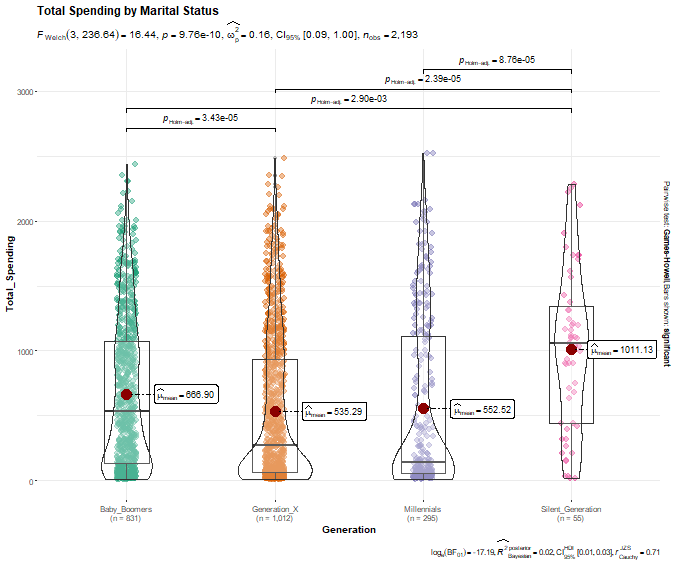

In [16]:
%%R -i df -w 24 -h 20 -u cm

ggbetweenstats(
  data  = df,
  x     = Generation,
  y     = Total_Spending,
  title = "Total Spending by Marital Status"
)